## Dataset cachexia - Clustering e redução de dimensionalidade
Nesta secção vamos trabalhar com os dados do dataset Cachexia : 

*"Concentrations of 63 metabolites in 77 urine samples from cancer patients, measured by 1H NMR (Eisner et al, 2011). Metadata defines the two groups: control and cachexic patients."*

Importação e análise da dimensão dos dados

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data_path = r"C:\Users\anaca\Documents\GitHub\SIB-ML-Portfolio\datasets\data_cachexia.csv"
meta_path = r"C:\Users\anaca\Documents\GitHub\SIB-ML-Portfolio\datasets\meta_cachexia.csv"

data = pd.read_csv(data_path,sep=',', index_col = 0)
meta = pd.read_csv(meta_path,sep=',', index_col = 0)
print (data.shape)
print (meta.shape)
data.head()

(77, 63)
(77, 1)


,1.6-Anhydro-beta-D-glucose,1-Methylnicotinamide,2-Aminobutyrate,2-Hydroxyisobutyrate,2-Oxoglutarate,3-Aminoisobutyrate,3-Hydroxybutyrate,3-Hydroxyisovalerate,3-Indoxylsulfate,4-Hydroxyphenylacetate,...,Tryptophan,Tyrosine,Uracil,Valine,Xylose,cis-Aconitate,myo-Inositol,trans-Aconitate,pi-Methylhistidine,tau-Methylhistidine
Patient ID,,,,,,,,,,,,,,,,,,,,,
PIF_178,40.85,65.37,18.73,26.05,71.52,1480.30,56.83,10.07,566.80,120.30,...,259.82,290.03,111.05,86.49,72.24,237.46,135.64,51.94,157.59,160.77
PIF_087,62.18,340.36,24.29,41.68,67.36,116.75,43.82,79.84,368.71,432.68,...,83.10,167.34,46.99,109.95,192.48,333.62,376.15,217.02,307.97,130.32
PIF_090,270.43,64.72,12.18,65.37,23.81,14.30,5.64,23.34,665.14,292.95,...,82.27,60.34,31.50,59.15,2164.62,330.30,86.49,58.56,145.47,83.93
NETL_005_V1,154.47,52.98,172.43,74.44,1199.91,555.57,175.91,25.03,411.58,214.86,...,235.10,323.76,30.57,102.51,125.21,1863.11,247.15,75.94,249.64,254.68
PIF_115,22.20,73.70,15.64,83.93,33.12,29.67,76.71,69.41,165.67,97.51,...,103.54,142.59,44.26,160.77,186.79,101.49,749.95,98.49,84.77,79.84


## Sumário dos dados

In [3]:
data.describe()
#data.columns

,1.6-Anhydro-beta-D-glucose,1-Methylnicotinamide,2-Aminobutyrate,2-Hydroxyisobutyrate,2-Oxoglutarate,3-Aminoisobutyrate,3-Hydroxybutyrate,3-Hydroxyisovalerate,3-Indoxylsulfate,4-Hydroxyphenylacetate,...,Tryptophan,Tyrosine,Uracil,Valine,Xylose,cis-Aconitate,myo-Inositol,trans-Aconitate,pi-Methylhistidine,tau-Methylhistidine
count,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,...,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000
mean,105.630390,71.573636,18.159740,37.250649,145.087143,76.756364,21.717013,21.647792,218.879221,112.021039,...,66.243117,81.757273,35.557662,35.667013,100.933377,204.219740,135.397532,40.630390,370.288312,89.686883
std,130.025595,133.192811,27.614526,23.956807,342.522174,191.014237,26.198904,24.946091,196.868730,120.812569,...,56.333318,83.248486,35.002894,29.697365,250.216325,278.141989,170.266474,39.566754,530.689300,77.239064
min,4.710000,6.420000,1.280000,4.850000,5.530000,2.610000,1.700000,0.920000,27.660000,15.490000,...,8.670000,4.220000,3.100000,4.100000,10.070000,12.940000,11.590000,4.900000,11.360000,8.000000
25%,28.790000,15.800000,5.260000,15.800000,22.420000,11.700000,5.990000,5.260000,82.270000,41.680000,...,21.330000,23.570000,11.940000,12.180000,29.960000,36.230000,30.270000,12.430000,67.360000,27.390000
50%,45.600000,36.600000,10.490000,32.460000,55.150000,22.650000,11.700000,12.550000,144.030000,70.110000,...,46.990000,60.340000,27.390000,33.120000,50.400000,129.020000,78.260000,26.840000,162.390000,68.720000
75%,141.170000,73.700000,19.490000,54.600000,92.760000,56.260000,29.960000,30.270000,333.620000,145.470000,...,96.540000,113.300000,44.260000,50.400000,89.120000,254.680000,167.340000,57.400000,387.610000,130.320000
max,685.400000,1032.770000,172.430000,93.690000,2465.130000,1480.300000,175.910000,164.020000,1043.150000,796.320000,...,259.820000,539.150000,179.470000,160.770000,2164.620000,1863.110000,854.060000,217.020000,2697.280000,317.350000


## Sumário dos metadados

In [4]:
meta.describe()

,Muscle.loss
count,77
unique,2
top,cachexic
freq,47


### Frequência de cada categoria nos metadados

In [5]:
meta.groupby("Muscle.loss").size()

Muscle.loss
cachexic    47
control     30
dtype: int64

In [11]:
from sklearn import preprocessing
array_data = preprocessing.scale(data)#, with_mean = False)  # Standardizes data, rescales it to have a mean of 0 and a standard deviation of 1
data_scale =  pd.DataFrame(array_data, index =data.index , columns = data.columns)

### Transformação logarítmica

In [12]:
log_data = np.log2(data)

### Correlações

In [13]:
corr_matrix = data.corr()
corr_matrix

,1.6-Anhydro-beta-D-glucose,1-Methylnicotinamide,2-Aminobutyrate,2-Hydroxyisobutyrate,2-Oxoglutarate,3-Aminoisobutyrate,3-Hydroxybutyrate,3-Hydroxyisovalerate,3-Indoxylsulfate,4-Hydroxyphenylacetate,...,Tryptophan,Tyrosine,Uracil,Valine,Xylose,cis-Aconitate,myo-Inositol,trans-Aconitate,pi-Methylhistidine,tau-Methylhistidine
1.6-Anhydro-beta-D-glucose,1.000000,0.058737,0.261133,0.502000,-0.011638,0.066444,0.213141,0.315203,0.284076,0.362212,...,0.477076,0.405719,0.076550,0.274734,0.239883,0.228877,0.034422,0.227732,0.283274,0.305215
1-Methylnicotinamide,0.058737,1.000000,0.001473,0.319200,0.070344,0.020080,0.143886,0.353414,0.350952,0.193748,...,0.193252,0.213351,0.153604,0.265853,0.073942,0.174632,0.217717,0.363028,0.101935,0.209146
2-Aminobutyrate,0.261133,0.001473,1.000000,0.386207,0.267917,0.312870,0.602727,0.111230,0.318236,0.288714,...,0.442360,0.455340,0.051508,0.394220,0.044776,0.623086,0.333103,0.232460,0.165093,0.356491
2-Hydroxyisobutyrate,0.502000,0.319200,0.386207,1.000000,0.390898,0.137614,0.523609,0.423808,0.387808,0.442970,...,0.616427,0.460935,0.365786,0.616313,0.283124,0.492954,0.521393,0.532692,0.242757,0.542963
2-Oxoglutarate,-0.011638,0.070344,0.267917,0.390898,1.000000,0.107302,0.463864,0.081948,0.088126,0.269571,...,0.326844,0.196630,0.464388,0.276786,0.001352,0.620086,0.226030,0.045211,0.121393,0.423475
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
cis-Aconitate,0.228877,0.174632,0.623086,0.492954,0.620086,0.280719,0.788881,0.493663,0.442458,0.375749,...,0.534450,0.693191,0.489057,0.620082,0.131992,1.000000,0.234888,0.347724,0.246590,0.555248
myo-Inositol,0.034422,0.217717,0.333103,0.521393,0.226030,0.050170,0.327568,0.247363,0.187753,0.308272,...,0.303620,0.275511,0.196810,0.520342,0.035814,0.234888,1.000000,0.298212,0.087485,0.167867
trans-Aconitate,0.227732,0.363028,0.232460,0.532692,0.045211,0.157105,0.443377,0.562218,0.453476,0.519558,...,0.393377,0.469261,0.299285,0.586871,0.152449,0.347724,0.298212,1.000000,0.043348,0.284674
pi-Methylhistidine,0.283274,0.101935,0.165093,0.242757,0.121393,0.035706,0.122016,0.318782,0.110577,0.157999,...,0.274903,0.308888,0.323873,0.320151,-0.042070,0.246590,0.087485,0.043348,1.000000,0.560223


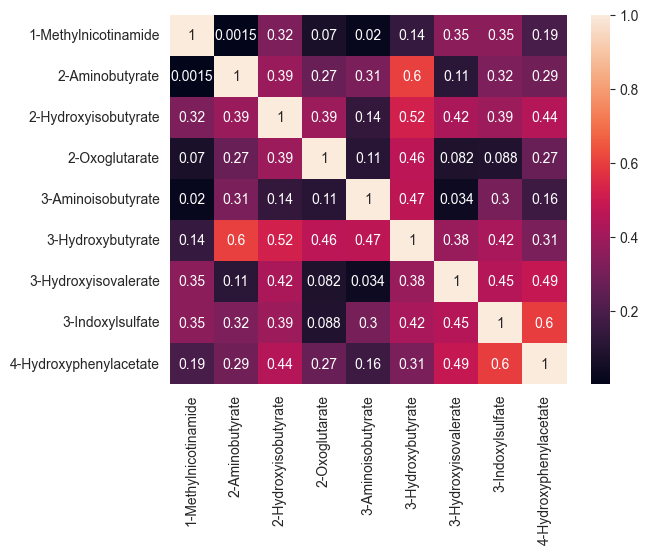

In [14]:
import seaborn as sn
sn.heatmap(corr_matrix.iloc[1:10,1:10], annot=True)
plt.show()

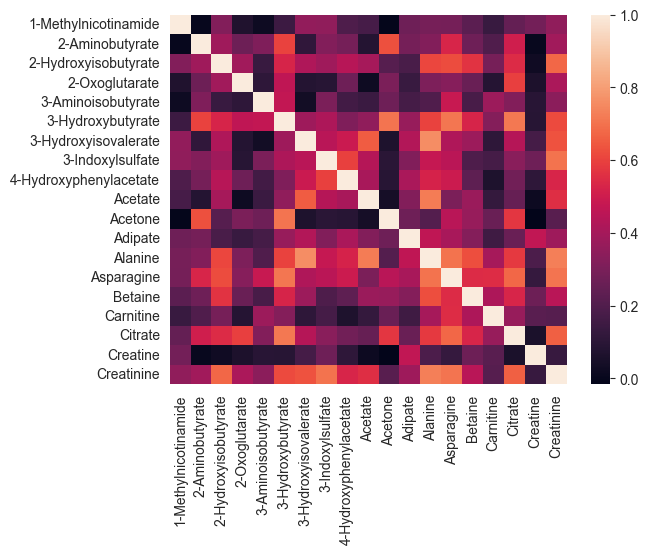

In [15]:
sn.heatmap(corr_matrix.iloc[1:20,1:20], annot=False)
plt.show()

### PCA
Principal Component Analysis (PCA) is a linear dimensionality reduction technique that can be utilized for extracting information from a high-dimensional space by projecting it into a lower-dimensional sub-space. It tries to preserve the essential parts that have more variation of the data and remove the non-essential parts with fewer variation. This is an Unsupervised dimensionality reduction technique, you can cluster the similar data points based on the feature correlation between them without any supervision (or labels)

Due to the number of features of this dataset, significantly higher than the iris one, it is useful to apply a PCA analysis

In [16]:
from sklearn.decomposition import PCA

pca_cachexia = PCA(n_components=5)

pca_cachexia.fit(data_scale)  # fits the model with the standardized data

pca_transformed = pca_cachexia.transform(data_scale) # applies a dimensionality reduction to the data, creating a low dimensional space with 5 components.

print('Var. explicada: %s'% str(pca_cachexia.explained_variance_ratio_))
print('Soma:', sum(pca_cachexia.explained_variance_ratio_) * 100, "%")

Var. explicada: [0.40426787 0.08180128 0.05333781 0.04845991 0.04368996]
Soma: 63.155683578657964 %


The explained variance, or eigenvalue, in PCA shows the variance that can be attributed to each of the principal components. It is an array of values where each value equals the variance of each principal component and the length of the array is equal to the number of components defined with n_components

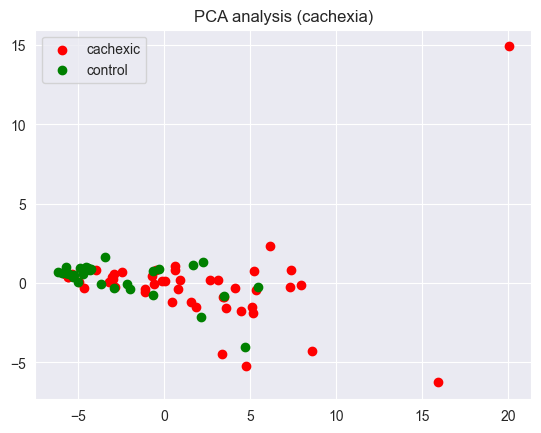

In [17]:
meta_values = meta["Muscle.loss"]
plt.figure()

for c, name in zip("rgb", ["cachexic", "control"]):  # assigns a rgb color to the groups
    plt.scatter(pca_transformed[meta_values == name, 0], pca_transformed[meta_values == name, 1], c=c, label=name)

plt.legend()
plt.title('PCA analysis (cachexia)')
plt.show()

### t-SNE
(T-distributed Stochastic Neighbor Embedding)
Data visualization technique using features extraction and dimensionality reduction, and it’s particularly well suited for the visualization of high-dimensional data sets. Contrary to PCA, it’s not a mathematical technique but a probabilistic one. It will maximize the distance in 2d space between observation in a high dimensional space, therefore similar observations come closer.


In [18]:
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2, n_iter=1000)
points = tsne.fit_transform(data_scale)

C:\Users\anaca\Documents\GitHub\SIB-ML-Portfolio\venv\lib\site-packages\sklearn\manifold\_t_sne.py:800: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
C:\Users\anaca\Documents\GitHub\SIB-ML-Portfolio\venv\lib\site-packages\sklearn\manifold\_t_sne.py:810: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


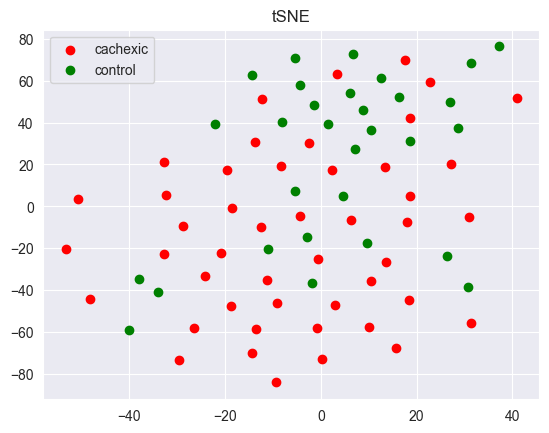

In [20]:
plt.figure()
for c, name in zip("rgb", ["cachexic", "control"]):
    plt.scatter(points[meta_values == name, 0], points[meta_values == name, 1], c=c, label=name)
plt.title("tSNE")
plt.legend(loc='best', shadow=False)
plt.show()

### K-means clustering
The objective of K-means is TO group similar data points together and discover underlying patterns. To achieve this objective, K-means looks for a fixed number (k) of clusters in a dataset. A cluster refers to a collection of data points aggregated together because of certain similarities. We need to define a target number k, which refers to the number of centroids you need in the dataset. A centroid is the imaginary or real location representing the center of the cluster. Every data point is allocated to each of the clusters through reducing the in-cluster sum of squares. In other words, the K-means algorithm identifies k number of centroids, and then allocates every data point to the nearest cluster, while keeping the centroids as small as possible.

In [22]:
from sklearn.cluster import KMeans
import pandas as pd

kmeans_est = KMeans(init='random', n_clusters=2, n_init = 100)
# init: Method for initialization
# n_init : Number of times the k-means algorithm will be run with different centroid seeds. 

kmeans_est.fit(data_scale)

res_kmeans = kmeans_est.predict(data_scale)
print("Clusters previstos: ", res_kmeans)

pd.crosstab(meta_values, res_kmeans)

Clusters previstos:  [1 1 1 1 1 1 0 0 0 1 0 1 1 0 0 0 0 0 0 1 0 1 1 0 0 0 1 1 0 1 0 0 0 0 0 0 1
 1 0 0 1 1 0 1 1 1 0 0 1 0 0 0 1 1 0 0 0 1 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0
 0 0 0]


col_0,0,1
Muscle.loss,,
cachexic,25,22
control,24,6


### Clustering hierárquico
The algorithm builds clusters by measuring the dissimilarities between data.
Agglomerative Hierarchical clustering Technique: In this technique, initially each data point is considered as an individual cluster. At each iteration, the similar clusters merge with other clusters until one cluster or K clusters are formed.
In simple words, we can say that the Divisive Hierarchical clustering is exactly the opposite of the Agglomerative Hierarchical clustering. In Divisive Hierarchical clustering, we consider all the data points as a single cluster and in each iteration, we separate the data points from the cluster which are not similar. Each data point which is separated is considered as an individual cluster. In the end, we’ll be left with n clusters.

In [27]:
from sklearn.cluster import AgglomerativeClustering
hclust = AgglomerativeClustering(n_clusters=2, affinity="euclidean", linkage="ward")
hclust.fit(data_scale)
res_hc = hclust.labels_
pd.crosstab(meta_values, res_hc)

col_0,0,1
Muscle.loss,,
cachexic,32,15
control,9,21


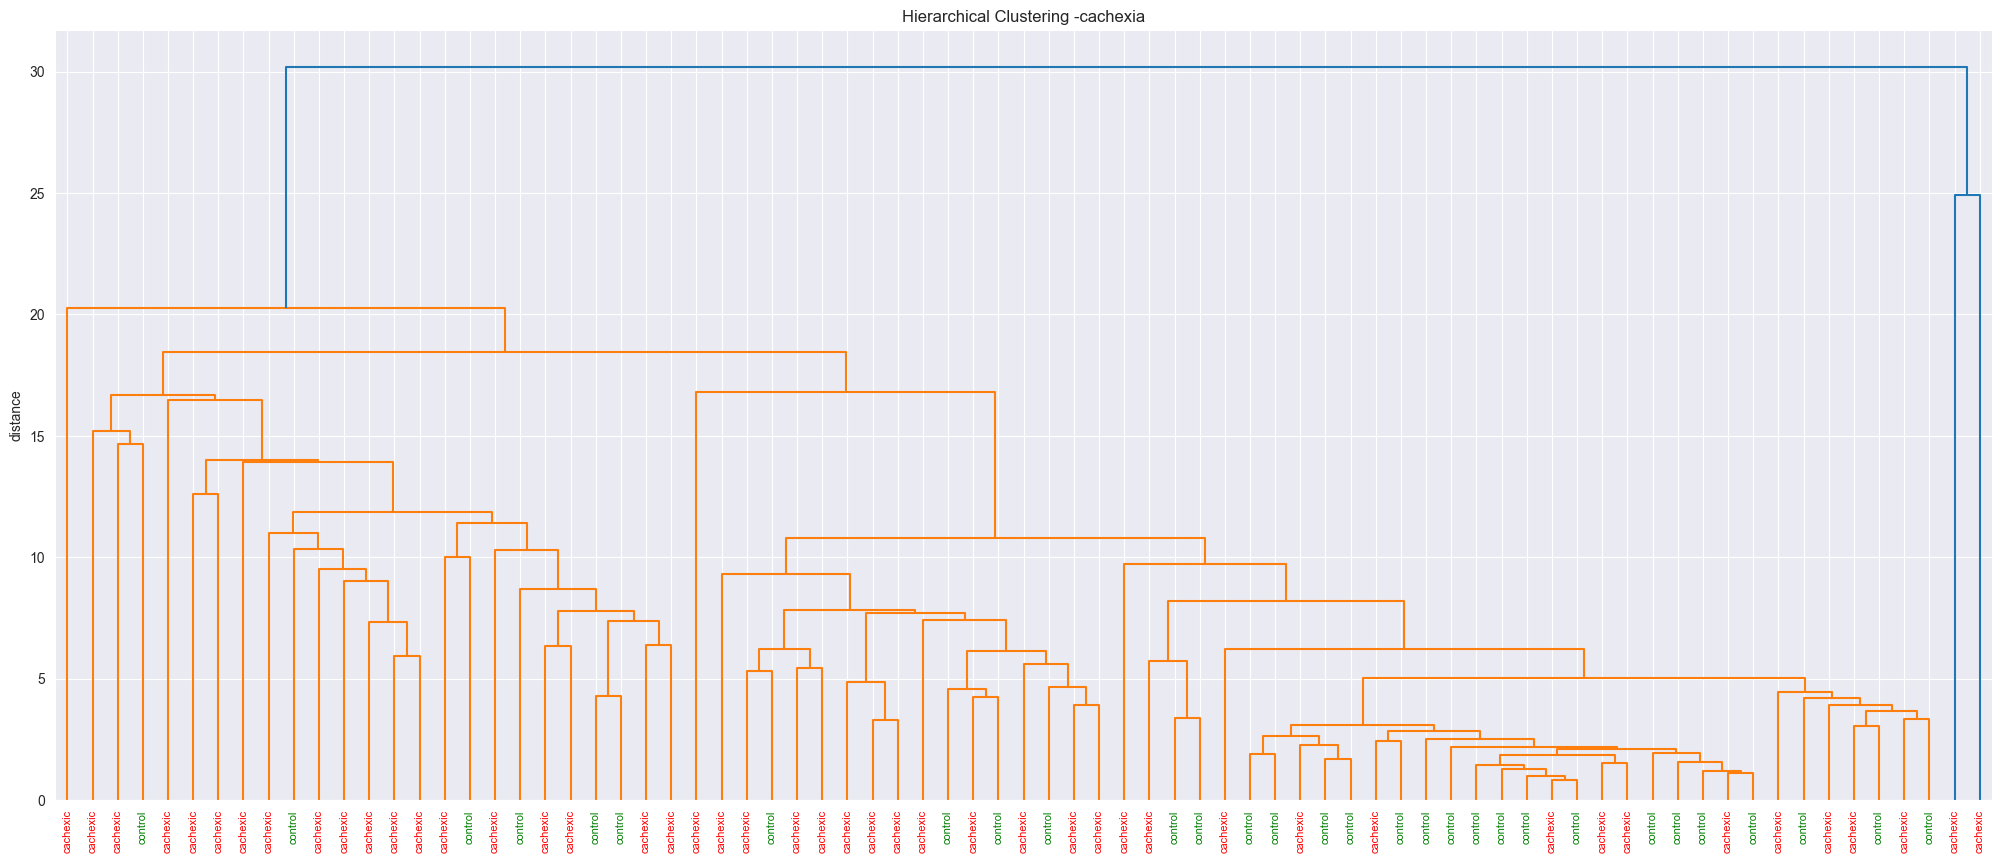

In [28]:
from scipy.cluster.hierarchy import dendrogram, linkage
Z = linkage(data_scale, method='complete', metric='euclidean')

# calculate full dendrogram
plt.figure(figsize=(25, 10))
dendrogram(
    Z,
    labels=list(meta["Muscle.loss"]),
    leaf_rotation=90.,  # rotates the x axis labels
    leaf_font_size=8.,  # font size for the x axis labels
)

plt.title('Hierarchical Clustering -cachexia')
plt.ylabel('distance')


# Assignment of colors to labels: 'a' is red, 'b' is green, etc.
label_colors = {'cachexic': 'r', 'control': 'g'}
ax = plt.gca()
xlbls = ax.get_xmajorticklabels()
for lbl in xlbls:
    lbl.set_color(label_colors[lbl.get_text()])

plt.show()


In [29]:
# Todos os clusters que fazemos mostram que os dados não têm um padrão claro que permita separar os dados